In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#importing train data
data=pd.read_excel(r'C:\Users\Joshua\Downloads\train1.xlsx')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#To check missing values
print(data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
train= data.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(train)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    0        1          3        0     1933        0     0   
1      40576   31   11        1          1        0        3        0     0   
2      15320   27    7        1          1        0      891        1     0   
3      43962   57    4        0          2        0     3287        0     0   
4      29842   31    9        1          1        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29    4        2          2        0        0        1     0   
31643  40178   53    4        0          2        0      380        0     1   
31644  19710   32    4        2          2        0      312        0     0   
31645  38556   57    9        1          1        0      225        1     0   
31646  14156   55    4        0          1        0      204        1     0   

       contact  day  month  duration  campaign  pda

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train=pd.DataFrame(train)
# Define the independent variables (features) and the dependent variable (target)
x = train.drop('subscribed', axis=1)
y= train['subscribed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x=sc.transform(x)

import pandas as pd

# Assuming you have the original column names
column_names = ['ID', 'age', 'job', 'marital', 'education', 'default', 
                'balance', 'housing', 'loan', 'contact', 'day', 
                'month', 'duration', 'campaign', 'pdays', 
                'previous', 'poutcome']



# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.9107424960505529

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.64      0.53      0.58       731

    accuracy                           0.91      6330
   macro avg       0.79      0.74      0.76      6330
weighted avg       0.90      0.91      0.91      6330


Confusion Matrix:
 [[5381  218]
 [ 347  384]]


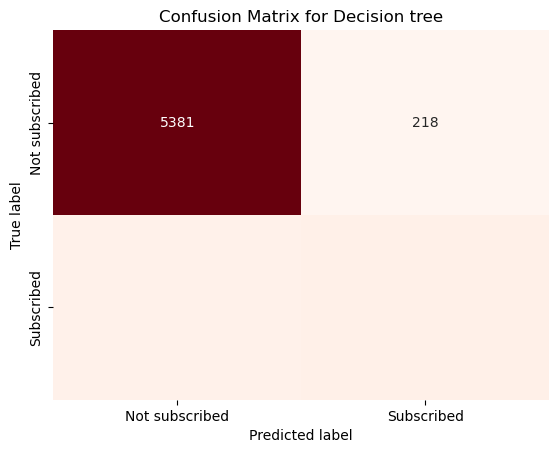

In [6]:
import seaborn as sns
# Assuming y_true and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
 # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not subscribed', 'Subscribed'],
            yticklabels=['Not subscribed', 'Subscribed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision tree')
plt.show()

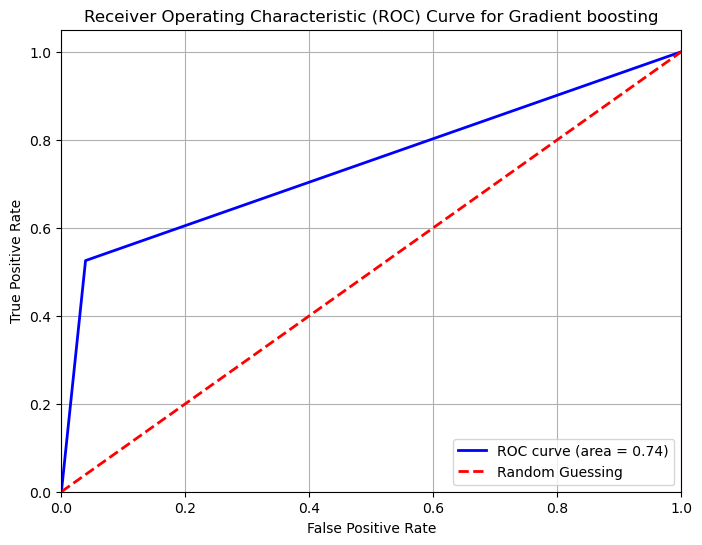

In [7]:
# Plotting ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [8]:
# Define cross-validation strategy
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(gb, x, y, cv=cv, scoring='accuracy')  # Use 'accuracy' for classification; 'neg_mean_squared_error' for regression

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.91232227 0.90868878 0.91057039 0.90709433 0.90835835]
Mean cross-validation score: 0.9094


In [9]:
cv_scores_f1 = cross_val_score(gb, x, y, cv=cv, scoring='f1')
print(f"Mean F1 Score: {cv_scores_f1.mean():.4f}")

Mean F1 Score: 0.5593


In [15]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# Precision
precision = cross_val_score(gb, x, y, cv=cv, scoring='precision')
print(f"Precision scores: {precision}")
print(f"Mean Precision score: {precision.mean():.4f}")

# Recall
recall = cross_val_score(gb, x, y, cv=cv, scoring='recall')
print(f"Recall scores: {recall}")
print(f"Mean Recall score: {recall.mean():.4f}")

# F1-Score
f1 = cross_val_score(gb, x, y, cv=cv, scoring='f1')
print(f"F1 scores: {f1}")
print(f"Mean F1 score: {f1.mean():.4f}")

Precision scores: [0.67279412 0.65027322 0.66729679 0.624      0.64954128]
Mean Precision score: 0.6528
Recall scores: [0.49259758 0.48048452 0.47510094 0.52489906 0.47644684]
Mean Recall score: 0.4899
F1 scores: [0.56876457 0.55263158 0.55503145 0.57017544 0.54968944]
Mean F1 score: 0.5593


In [16]:
#random search
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


train=pd.DataFrame(train)
# Define the independent variables (features) and the dependent variable (target)
x = train.drop('subscribed', axis=1)
y= train['subscribed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x=sc.transform(x)

import pandas as pd

# Assuming you have the original column names
column_names = ['ID', 'age', 'job', 'marital', 'education', 'default', 
                'balance', 'housing', 'loan', 'contact', 'day', 
                'month', 'duration', 'campaign', 'pdays', 
                'previous', 'poutcome']

# Convert x to a DataFrame
x_df = pd.DataFrame(x, columns=column_names)




C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Define the parameter grid for Random Search
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],   # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Step size for each boosting stage
    'max_depth': [3, 4, 5, 6, 7],                 # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]                  # Fraction of samples used to fit each base learner
}


In [19]:
# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)


In [20]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, 
                                   param_distributions=param_distributions, 
                                   n_iter=100,       # Number of parameter settings sampled
                                   cv=3,             # 3-fold cross-validation
                                   verbose=2,        # Verbosity
                                   random_state=42,  # Ensures reproducibility
                                   n_jobs=-1)        # Use all available cores


In [21]:
# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [24]:
# Get the best model
best_gb = random_search.best_estimator_

# Predict on the test set
y_pred = best_gb.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}
Accuracy: 0.9153238546603476
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.65      0.56      0.61       731

    accuracy                           0.92      6330
   macro avg       0.80      0.76      0.78      6330
weighted avg       0.91      0.92      0.91      6330



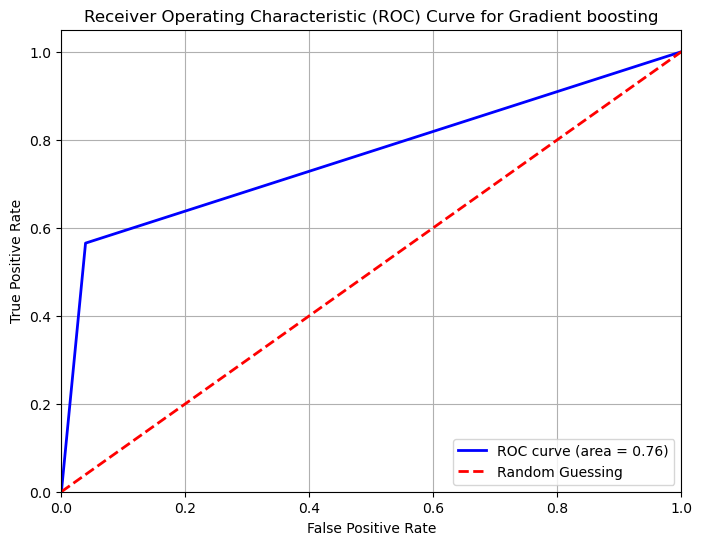

In [39]:
# Plotting ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [25]:
# Define cross-validation strategy
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(best_gb, x, y, cv=cv, scoring='accuracy')  # Use 'accuracy' for classification; 'neg_mean_squared_error' for regression

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.91421801 0.91295419 0.91009638 0.90788434 0.9108864 ]
Mean cross-validation score: 0.9112


In [26]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# Precision
precision = cross_val_score(best_gb, x, y, cv=cv, scoring='precision')
print(f"Precision scores: {precision}")
print(f"Mean Precision score: {precision.mean():.4f}")

# Recall
recall = cross_val_score(best_gb, x, y, cv=cv, scoring='recall')
print(f"Recall scores: {recall}")
print(f"Mean Recall score: {recall.mean():.4f}")

# F1-Score
f1 = cross_val_score(best_gb, x, y, cv=cv, scoring='f1')
print(f"F1 scores: {f1}")
print(f"Mean F1 score: {f1.mean():.4f}")

Precision scores: [0.68115942 0.67266187 0.65703971 0.62269939 0.64696223]
Mean Precision score: 0.6561
Recall scores: [0.50605653 0.50336474 0.48990579 0.54643338 0.53028264]
Mean Recall score: 0.5152
F1 scores: [0.58069498 0.57582756 0.5612953  0.58207885 0.58284024]
Mean F1 score: 0.5765


In [22]:
#importing test data
data1=pd.read_excel('C:\\Users\\Joshua\\Downloads\\test1.xlsx')
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
test= data1.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(test)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
1      40403   78    5        0          0        0     2787        0     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
4      12527   45    1        0          1        0     -705        0     1   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   
13563  34839   29    0        1          1        0        2        1     0   

       contact  day  month  duration  campaign  pda

In [27]:
test_pred = best_gb.predict(test)
test_pred


array([0, 0, 0, ..., 0, 1, 0])

In [28]:
submissions = pd.DataFrame()

In [29]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [30]:
submissions['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int32

In [31]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [32]:
submissions['subscribed']


0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [33]:
submissions.to_csv(' Gradient boosting submission file.csv', header=True, index=False)

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Example: Assume `new_clients_df` is your DataFrame with new client data
# new_clients_df = pd.read_csv('new_clients.csv')

# Ensure the new data is preprocessed in the same way as the training data
# Apply any encoding, scaling, etc., here

# Predict the likelihood of subscription
subscription_probabilities = best_gb.predict_proba(test)[:, 1]  # Get probabilities for the positive class (subscribed)

# If you want binary predictions:
subscription_predictions = best_gb.predict(test)



In [36]:
# Save the probabilities or predictions
output_prob = pd.DataFrame({'ID': test['ID'], 'Subscription_Likelihood': subscription_probabilities})
output_prob.to_csv('subscription_likelihoods.csv', index=False)

output_pred = pd.DataFrame({'ID': test['ID'], 'Subscription_Prediction': subscription_predictions})
output_pred.to_csv('subscription_predictions.csv', index=False)

print("Predictions and likelihoods have been saved.")


Predictions and likelihoods have been saved.


In [37]:
import pandas as pd

# Load the saved CSV files
output_prob = pd.read_csv('subscription_likelihoods.csv')
output_pred = pd.read_csv('subscription_predictions.csv')

# Display the first few rows of each DataFrame
print("Subscription Likelihoods:")
print(output_prob.head())  # Display the first 5 rows of the likelihoods




Subscription Likelihoods:
      ID  Subscription_Likelihood
0  38441                 0.004534
1  40403                 0.379951
2   3709                 0.224152
3  37422                 0.004963
4  12527                 0.004062


In [38]:
print("\nSubscription Predictions:")
print(output_pred.head())  # Display the first 5 rows of the predictions


Subscription Predictions:
      ID  Subscription_Prediction
0  38441                        0
1  40403                        0
2   3709                        0
3  37422                        0
4  12527                        0
